**Connecting to my google drive (in order to upload the dataset)**

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing all libraries and packages**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loading  the dataset

In [54]:
kolesa_ds = pd.read_csv('/content/drive/MyDrive/dataset/newCARS.csv')

In [55]:
# check first 5 rows 
kolesa_ds.head()

,_id,Бренд,Год,Город,Коробка,Кузов,Модель,Объем,Привод,Пробег,Топливо,Цена
0,63ee3fb5cd8947c8a954d662,Nissan,1995,Шымкент,механика,седан,Primera,1.6,передний привод,319214,бензин,881000
1,63ee3fb5cd8947c8a954d663,Mitsubishi,2020,Алматы,механика,пикап,L200,2.4,полный привод,140000,дизель,14490000
2,63ee3fb5cd8947c8a954d664,ВАЗ (Lada),2007,Актобе,механика,седан,2115 (седан),1.5,передний привод,140000,бензин,750000
3,63ee3fb5cd8947c8a954d665,Porsche,2020,Нур-Султан (Астана),автомат,кроссовер,Cayenne Coupe,3.0,полный привод,140000,бензин,56062500
4,63ee3fb5cd8947c8a954d666,JAC,2020,Костанай,механика,пикап,T6,2.0,полный привод,140000,дизель,7550000


In [56]:
kolesa_ds.shape

(19985, 12)

# Data processing

**Find all missing values and dropping them:**

In [57]:
kolesa_ds.isnull().sum()

_id           0
Бренд         0
Год           0
Город         0
Коробка       0
Кузов         0
Модель       35
Объем        14
Привод     2245
Пробег        0
Топливо      14
Цена          0
dtype: int64

In [58]:
kolesa_ds.dropna(inplace=True)

**Count and show all the types of categorical data:**

In [59]:
print(kolesa_ds.Кузов.value_counts())
print(kolesa_ds.Топливо.value_counts())
print(kolesa_ds.Привод.value_counts())
print(kolesa_ds.Коробка.value_counts())

седан           8500
кроссовер       2159
внедорожник     1955
хэтчбек         1830
универсал       1094
минивэн          827
фургон           293
пикап            292
микроавтобус     245
купе             222
лифтбек          114
микровэн          87
лимузин           45
кабриолет         17
фастбек            5
родстер            5
тарга              4
хардтоп            1
Name: Кузов, dtype: int64
бензин    14266
газ        2398
дизель      986
гибрид       45
Name: Топливо, dtype: int64
передний привод    9767
полный привод      4905
задний привод      3023
Name: Привод, dtype: int64
механика     7882
автомат      7766
типтроник    1412
вариатор      481
робот         154
Name: Коробка, dtype: int64


**Encoding the categorical columns**

In [60]:
kolesa_ds.replace({'Кузов': {'седан': 0, 'кроссовер': 1, 'внедорожник': 2, 'хэтчбек': 3, 'лифтбек': 4, 'универсал': 5,
                              'минивэн': 6, 'фургон': 7, 'пикап': 8, 'микроавтобус': 9, 'купе': 10, 'микровэн': 11, 
                              'лимузин': 12, 'кабриолет': 13, 'фастбек': 14, 'тарга': 15, 'родстер': 16, 'хардтоп': 17},
                     'Топливо': {'бензин': 0, 'газ': 1, 'гибрид': 2, 'дизель': 3},
                     'Привод': {'передний привод': 0, 'полный привод': 1, 'задний привод': 2},
                     'Коробка': {'механика': 0, 'автомат': 1, 'типтроник': 2, 'вариатор': 3, 'робот': 4}}, inplace=True)

In [61]:
kolesa_ds.head()

,_id,Бренд,Год,Город,Коробка,Кузов,Модель,Объем,Привод,Пробег,Топливо,Цена
0,63ee3fb5cd8947c8a954d662,Nissan,1995,Шымкент,0,0,Primera,1.6,0,319214,0,881000
1,63ee3fb5cd8947c8a954d663,Mitsubishi,2020,Алматы,0,8,L200,2.4,1,140000,3,14490000
2,63ee3fb5cd8947c8a954d664,ВАЗ (Lada),2007,Актобе,0,0,2115 (седан),1.5,0,140000,0,750000
3,63ee3fb5cd8947c8a954d665,Porsche,2020,Нур-Султан (Астана),1,1,Cayenne Coupe,3.0,1,140000,0,56062500
4,63ee3fb5cd8947c8a954d666,JAC,2020,Костанай,0,8,T6,2.0,1,140000,3,7550000


# **Dropping the data and defining the target**

In [62]:
X = kolesa_ds.drop(['Бренд','Цена','Город','Модель','Цена', '_id'],axis=1)
Y = kolesa_ds['Цена']

**The data, that will be used:**

In [63]:
print(X)

        Год  Коробка  Кузов  Объем  Привод  Пробег  Топливо
0      1995        0      0    1.6       0  319214        0
1      2020        0      8    2.4       1  140000        3
2      2007        0      0    1.5       0  140000        0
3      2020        1      1    3.0       1  140000        0
4      2020        0      8    2.0       1  140000        3
...     ...      ...    ...    ...     ...     ...      ...
19977  2007        0      0    1.6       0    1450        0
19978  1992        0     10    1.8       0   11111        0
19981  2013        0      3    1.6       0  179000        1
19982  2000        0      3    1.6       0  140000        0
19984  2019        1      6    2.5       2   22000        3

[17695 rows x 7 columns]


**Storing the target values:**

In [64]:
print(Y)

0          881000
1        14490000
2          750000
3        56062500
4         7550000
           ...   
19977     1300000
19978      950000
19981     1700000
19982      370000
19984    17500000
Name: Цена, Length: 17695, dtype: int64


# Spitting the training and testing data's




In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Training the model

**Using the linear regression:**

In [66]:
lin_reg_model = LinearRegression()

In [67]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Giving prediction on training:**

In [68]:
training_data_prediction = lin_reg_model.predict(X_train)

**Evaluating the R^2 error score:**

In [69]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R^2 Error : ", error_score)

R^2 Error :  0.4032026732642384


**Visualizing the Actual and Predicted prices**

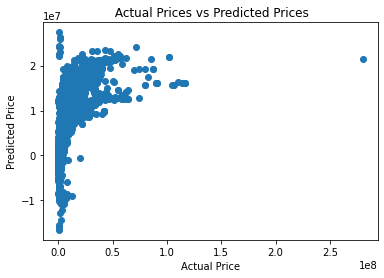

In [70]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**Prediction on test data:**

In [71]:
test_data_prediction = lin_reg_model.predict(X_test)

In [72]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R^2 Error : ", error_score)

R^2 Error :  0.43471705054072884


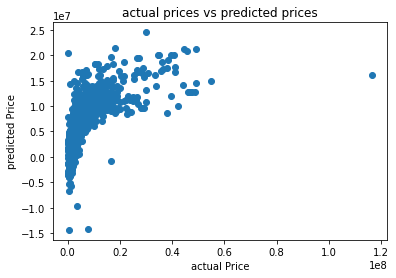

In [73]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual Price")
plt.ylabel("predicted Price")
plt.title("actual prices vs predicted prices")
plt.show()

**Testing the model on own data:**

In [74]:
new_car = {'Пробег': 140000, 'Год': 2020, 'Топливо': 3, 'Кузов': 8, 'Привод': 1, 'Коробка': 0, 'Объем': 2.4}
new_car_df = pd.DataFrame(new_car, index=[0])
new_car_price = lin_reg_model.predict(new_car_df) #making a prediction for new car

print('Predicted price of the car:', round((new_car_price[0]), 2))

Predicted price of the car: 51362836669.04


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# Visualization for data

**Plot for distribution of car prices:**

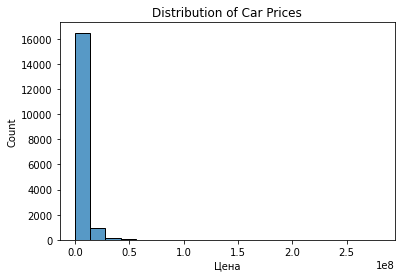

In [75]:
sns.histplot(data=kolesa_ds, x="Цена", bins=20)
plt.title("Distribution of Car Prices")
plt.show()

**Heatmap correlation matrix:**

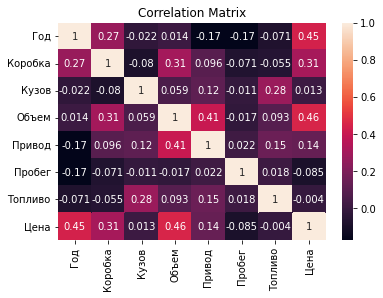

In [76]:
corr_matrix = kolesa_ds.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

**Top 10 brands from the dataset:**

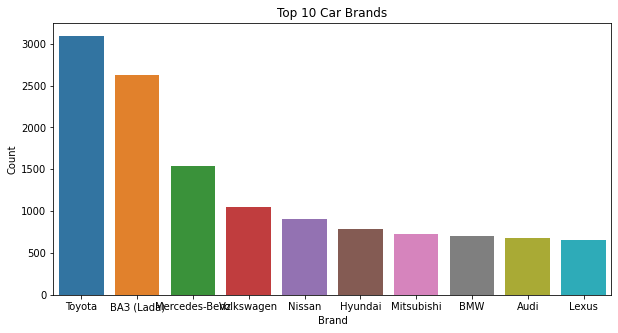

In [77]:
top_10_brands = kolesa_ds['Бренд'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values)
plt.title("Top 10 Car Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

**The dearest models among the dataset:**

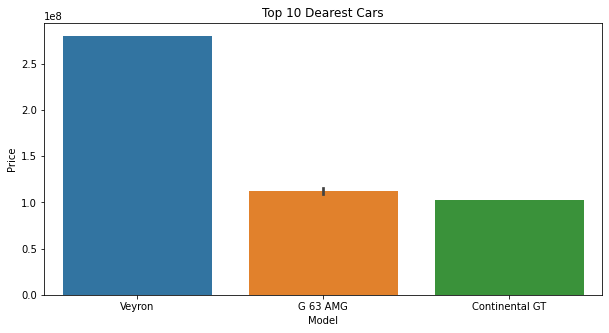

In [78]:
top_10_dearest_cars = kolesa_ds.sort_values(by='Цена', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='Модель', y='Цена', data=top_10_dearest_cars)
plt.title("Top 10 Dearest Cars")
plt.xlabel("Model")
plt.ylabel("Price")
plt.show()